In [20]:
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModel

In [21]:
#ckpt = "./backup/checkpoint-34000"
#ckpt = "./checkpoint-100000"
#ckpt = "./tokenizer_bpe_256_v5"
#ckpt = "./tokenizer_unigram_251_v2"
ckpt = "./results_nc_first_pass/checkpoint-10000"

In [22]:
tokenizer = AutoTokenizer.from_pretrained(ckpt)

In [23]:
# chr5:3,566,700-3,567,700

In [24]:
seq = "ATAAACATATCATAAATAAGATCAATATTAATAAAATAAATAGTTTTTTTTACGGGACGGATTGGCGGGACGAGTTTAGCAGGACGTAACTTAATAACAATTGTAAACTATAAAATAAAAATATTTTATAGATAGATACAATTTGCAAACTTTTATATATACTAACTTAAAAAAAAAATATTGTCCCCTGCGGTATAAGACGGGTTAAAAATCTAGTTGTTATTATTAAAGGAAATAAAATATCCTCATAAAACAATTTGTTGTAATCTATCTTTGGGCTAATGTTCTTATCCTACAAGACGAACCCTGACCGTATTCGTCGTAGAAAAAAAATTGCTTCGATCCCATCATTGAGTTCAATAATCGGCGCACAAAGGCCGATTCATAAAAACTCTAGGCCCATTAAAGTAAAGCCCATTCTCAACCCTATCCAGTCTCCCTGTATATATATATTTACGACACCAACCCAGCGTTGATATTTAATTTTCTTCAGTCAGAGATTTCGAAACCCTAGTCGATTTCGAGATCCAACTAACTCTGCTCCTTATCTCAGGTAAAATTCTCGCTCGAGAACTCAATTGCTTATCCAAAGTTCCAACTGAAGATGCTTTCCTACTGAATCTTAGGTTAATGTTTTGGATTTGGAATCTTACCCGAAATTTCTCTGCAGCTTGTTGAATTTGCGAAGTATGGGAGACGCTAGAGACAACGAAGCCTACGAGGAGGAGCTCTTGGACTATGAAGAAGAAGACGAGAAGGTCCCAGATTCTGGAAACAAAGTTAACGGCGAAGCTGTGAAAAAGTGAGTTTTATGGTTTCCTCGATATGTTTCATGTATACTACTGTGTGTTTAAATTTGTCGATTCTTAGATTACTACTTGATAACAAGTAGCAGTATGTGTTTAATTAGTTGCTTAACATATAACAATTGACTGAGTTCTTCATTGCTATAATTCCTGAAACCCACCCAATATTAGACTGTCGTGTGTTTCTCATATTG"
len(seq)

1000

In [25]:
tokenized_input = tokenizer(seq, return_token_type_ids=False, return_tensors="pt")
tokenized_input

{'input_ids': tensor([[0, 5, 8,  ..., 8, 7, 1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}

In [26]:
tokenizer.decode(tokenizer(seq)["input_ids"])

'[CLS] a t a a a c a t a t c a t a a a t a a g a t c a a t a t t a a t a a a a t a a a t a g t t t t t t t t a c g g g a c g g a t t g g c g g g a c g a g t t t a g c a g g a c g t a a c t t a a t a a c a a t t g t a a a c t a t a a a a t a a a a a t a t t t t a t a g a t a g a t a c a a t t t g c a a a c t t t t a t a t a t a c t a a c t t a a a a a a a a a a t a t t g t c c c c t g c g g t a t a a g a c g g g t t a a a a a t c t a g t t g t t a t t a t t a a a g g a a a t a a a a t a t c c t c a t a a a a c a a t t t g t t g t a a t c t a t c t t t g g g c t a a t g t t c t t a t c c t a c a a g a c g a a c c c t g a c c g t a t t c g t c g t a g a a a a a a a a t t g c t t c g a t c c c a t c a t t g a g t t c a a t a a t c g g c g c a c a a a g g c c g a t t c a t a a a a a c t c t a g g c c c a t t a a a g t a a a g c c c a t t c t c a a c c c t a t c c a g t c t c c c t g t a t a t a t a t a t t t a c g a c a c c a a c c c a g c g t t g a t a t t t a a t t t t c t t c a g t c a g

In [27]:
tokens = tokenizer.decode(tokenizer(seq)["input_ids"]).split(" ")[1:-1]
len(tokens)

1000

In [28]:
model = AutoModel.from_pretrained(ckpt)
model.eval()

Some weights of the model checkpoint at ./results_nc_first_pass/checkpoint-10000 were not used when initializing LongformerModel: ['lm_head.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing LongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LongformerModel were not initialized from the model checkpoint at ./results_nc_first_pass/checkpoint-10000 and are newly initialized: ['longformer.pooler.dense.bias', 'longformer.pooler.dense.weight']
You should probably

LongformerModel(
  (embeddings): LongformerEmbeddings(
    (word_embeddings): Embedding(14, 768, padding_idx=3)
    (position_embeddings): Embedding(1030, 768, padding_idx=3)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): LongformerEncoder(
    (layer): ModuleList(
      (0): LongformerLayer(
        (attention): LongformerAttention(
          (self): LongformerSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (query_global): Linear(in_features=768, out_features=768, bias=True)
            (key_global): Linear(in_features=768, out_features=768, bias=True)
            (value_global): Linear(in_features=768, out_features=768, bias=True)
          )
          (outp

In [29]:
output = model(**tokenized_input, output_attentions=True)

In [30]:
output.global_attentions is None   # should fix this

True

In [31]:
output_attentions = torch.cat(output.attentions)
output_attentions.shape

torch.Size([12, 12, 1002, 33])

In [34]:
#attention_strength = output_attentions.mean(dim=[0,1,2]).detach().numpy()[1:-1]
attention_strength = output_attentions.mean(dim=[0,1,2]).detach().numpy()
attention_strength.shape

(33,)

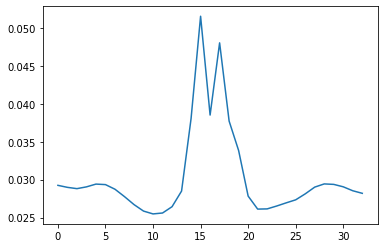

In [35]:
plt.plot(attention_strength)

In [39]:
# TODO: make sure there are no +-1 errors
def write_bedgraph(tokens, attention_strength, chromosome, start, output_path):
    lines = ['track type=bedGraph name="attention_strength" description="attention_strength" visibility=full\n']
    for token, strength in zip(tokens, attention_strength):
        lines.append(f"{chromosome} {start-1} {start-1+len(token)} {strength}\n")
        start += len(token)
    with open(output_path, "w") as f:
        f.writelines(lines)

In [40]:
write_bedgraph(tokens, attention_strength, "chr5", 3566700, "test.txt")

In [26]:
!head test.txt 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
track type=bedGraph name="attention_strength" description="attention_strength" visibility=full
chr5 3566699 3566705 0.005050894804298878
chr5 3566705 3566712 0.004797599744051695
chr5 3566712 3566720 0.006602458655834198
chr5 3566720 3566727 0.005135985091328621
chr5 3566727 3566736 0.0054971687495708466
chr5 3566736 3566745 0.006728466134518385
chr5 3566745 3566751 0.007697186432778835
chr5 3566751 3566756 0.0075244964100420475
chr5 3566756 3566761 0.00661446712911129


In [19]:
max(attention_strength)

0.012055175

In [20]:
import numpy as np
np.argmax(attention_strength)

30

In [21]:
np.array(tokens)[np.argsort(attention_strength)[::-1][:20]]

array(['cgggtt', 'tttagca', 'aggcccat', 'gctcttg', 'ttttta', 'cggga',
       'aaataaaa', 'cgaagcc', 'tcttag', 'tcgtcgt', 'gtgtg', 'tgtgtgt',
       'cctgaa', 'gcggt', 'aaatagttt', 'ggacg', 'ggatttgg', 'tgtcgat',
       'agcag', 'aatgtttt'], dtype='<U10')

In [22]:
'atg' in tokens

False

In [23]:
tokens[0]

'ataaac'